In [ ]:
pip install polars

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install psycopg2

In [ ]:
import pandas as pd
import numpy as np
import polars as pl
import psycopg2

In [ ]:
# Mengatur parameter koneksi database PostgreSQL
host = 'tabeldata.ip-dynamic.com'
database = 'hasjrat'
user = 'postgres'
password = 'passwordnyaPostgres'

# Membuat koneksi ke database
conn = psycopg2.connect(host=host, database=database, user=user, password=password)

# Membuat cursor
cur = conn.cursor()

# Menjalankan query SQL untuk mengambil data
query = "SELECT * FROM car_list"
cur.execute(query)

# Mengambil hasil query dan menyimpannya ke dalam dataframe
columns = [desc[0] for desc in cur.description]  # Mengambil nama kolom dari hasil query
data = cur.fetchall()  # Mengambil data dari hasil query
df_final = pd.DataFrame(data, columns=columns)  # Membuat dataframe dari data

# Menutup cursor dan koneksi database
cur.close()
conn.close()

# Bagian Baru

In [ ]:
# # Mengatur parameter koneksi database PostgreSQL
# host = 'tabeldata.ip-dynamic.com'
# database = 'hasjrat'
# user = 'postgres'
# password = 'passwordnyaPostgres'

# # Membuat koneksi ke database
# conn = psycopg2.connect(host=host, database=database, user=user, password=password)

# # Membuat cursor
# cur = conn.cursor()

# # Menjalankan query SQL untuk mengambil data
# query = "SELECT * FROM vw_detail_penjualan_toyota"
# cur.execute(query)

# # Mengambil hasil query dan menyimpannya ke dalam dataframe
# columns = [desc[0] for desc in cur.description]  # Mengambil nama kolom dari hasil query
# data = cur.fetchall()  # Mengambil data dari hasil query
# df = pd.DataFrame(data, columns=columns)  # Membuat dataframe dari data

# # Menutup cursor dan koneksi database
# cur.close()
# conn.close()

In [ ]:
# df = df[['outlet','Outlet Code','model','Model (TAM)','Product Id']]

# df_pl = pl.from_pandas(df)
# df_pl = df_pl.groupby(['outlet', 'model','Model (TAM)']).count()
# df_pd = df_pl.to_pandas()

# df_pd = df_pd.rename(columns={'Model (TAM)': 'class'})
# df_pd = df_pd.dropna()

In [ ]:
# print(df_pd.shape)
# df_pd.head(3)

In [ ]:
# # Mengatur parameter koneksi database PostgreSQL
# host = 'tabeldata.ip-dynamic.com'
# database = 'hasjrat'
# user = 'postgres'
# password = 'passwordnyaPostgres'

# # Membuat koneksi ke database
# conn = psycopg2.connect(host=host, database=database, user=user, password=password)

# # Membuat cursor
# cur = conn.cursor()

# # Menjalankan query SQL untuk mengambil data
# query = "SELECT item_model,item_class1,category FROM item"
# cur.execute(query)

# # Mengambil hasil query dan menyimpannya ke dalam dataframe
# columns = [desc[0] for desc in cur.description]  # Mengambil nama kolom dari hasil query
# data = cur.fetchall()  # Mengambil data dari hasil query
# df_cat = pd.DataFrame(data, columns=columns)  # Membuat dataframe dari data

# # Menutup cursor dan koneksi database
# cur.close()
# conn.close()

In [ ]:
# # merge dengan tabel df_pd (dataframe yang digunakan)
# df_final = pd.merge(df_pd, df_cat, how='left',  left_on=['model','class'], right_on=['item_model','item_class1'])

In [ ]:
# print(df_final.shape)
# df_final.head()

In [ ]:
# df_final['outlet'] = df_final['outlet'].str.lower()

In [ ]:
# df_final.head()

**dataframe yang ga ada null**

In [ ]:
# df_non_null = df_final.dropna()
# df_non_null

In [ ]:
# df_non_null["class"].unique()

**Data yang ada nullnya**

In [ ]:
# # data yang kosong
# nan_rows = df_final[df_final.isna().any(axis=1)]

In [ ]:
# nan_rows["class"].unique()

In [ ]:
# nan_rows.shape

In [ ]:
# Landcruiser, innova, fortuner, avanza, Vios, alphard, camry, dyna

**Isi data kolom category di dataframe df_final**

In [ ]:
# df_final['item_model'].fillna(df_final['model'], inplace=True)
# df_final['item_class1'].fillna(df_final['class'], inplace=True)

In [ ]:
# df_final['category'] = df_final.groupby('class')['category'].fillna(method='ffill')

In [ ]:
# # df_final.loc[df_final['item_class1'] == 'LAND CRUISER', 'category'] = df_final.loc[df_final['item_class1'] == 'LAND CRUISER', 'category']

# # Category Landcruiser == suv
# df_final.loc[df_final['item_class1'] == 'LAND CRUISER', 'category'] = 'suv'


In [ ]:
# # Jika mau melihat class yang kategorinya masih null
# nan_rows["class"].unique()

In [ ]:
# # cek apakah sudah terisi
# df_final.query("item_class1 == 'LAND CRUISER'")

In [ ]:
# df_final

In [ ]:
# df_final.isna().sum()

# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(color_codes=True)
sns.set_style('whitegrid')


[Text(0, 0, '1'),
 Text(0, 0, '52'),
 Text(0, 0, '198'),
 Text(0, 0, '405'),
 Text(0, 0, '876'),
 Text(0, 0, '1629')]

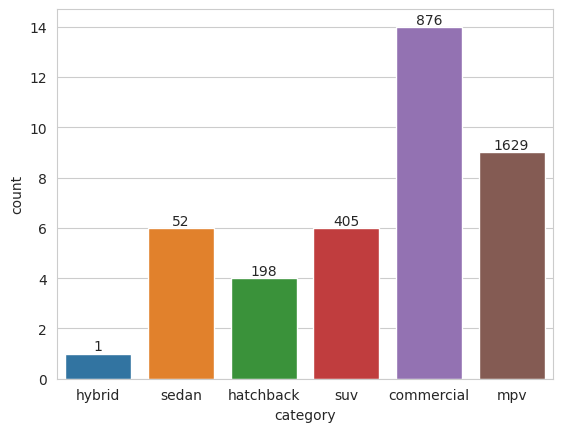

In [ ]:
# Gender
lokasi = df_final.query('outlet == "sorong"  ')
z = lokasi.groupby('category')['count'].sum().sort_values().values

ax = sns.countplot(data=lokasi, x="category",order=lokasi.groupby('category')['count'].sum().sort_values().index)
# abs_values = lokasi['category'].value_counts(ascending=False).values
abs_values = z
ax.bar_label(ax.containers[0], labels=abs_values)

In [ ]:
z

array([   1,   52,  198,  405,  876, 1629])

In [ ]:
lokasi.groupby('category')['count'].sum()

category
commercial     876
hatchback      198
hybrid           1
mpv           1629
sedan           52
suv            405
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

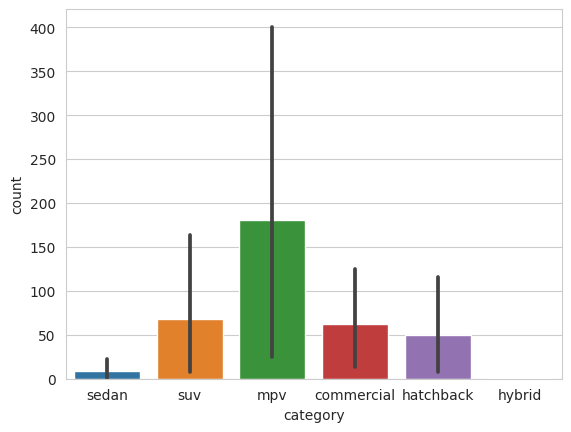

In [ ]:
sns.barplot(x=lokasi["category"],y=lokasi['count'])

# Sistem Rekomendasi

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlet       1322 non-null   object
 1   model        1322 non-null   object
 2   class        1322 non-null   object
 3   count        1322 non-null   int64 
 4   item_model   1322 non-null   object
 5   item_class1  1322 non-null   object
 6   category     1322 non-null   object
dtypes: int64(1), object(6)
memory usage: 72.4+ KB


In [ ]:
def important_features(dataset):
    data = dataset.copy()
    for i in range(0, dataset.shape[0]):
        data['imp']=data["outlet"]+' '+data["class"]+' '+data["category"]
    return data

In [ ]:
data = important_features(df_final)

In [ ]:
data['ids'] = [i for i in range(0, data.shape[0])]

In [ ]:
data

,outlet,model,class,count,item_model,item_class1,category,imp,ids
0,tomohon toyota,HILUX DOUBLE CABIN 2.5 DIESEL,HILUX DC,1,HILUX DOUBLE CABIN 2.5 DIESEL,HILUX DC,commercial,tomohon toyota HILUX DC commercial,0
1,biak,SIENTA 1.5,SIENTA,5,SIENTA 1.5,SIENTA,mpv,biak SIENTA mpv,1
2,kotamobagu,AGYA 1.0,AGYA,169,AGYA 1.0,AGYA,hatchback,kotamobagu AGYA hatchback,2
3,nabire,HILUX EXTRA CABIN 2.5 DIESEL,HILUX EC,11,HILUX EXTRA CABIN 2.5 DIESEL,HILUX EC,commercial,nabire HILUX EC commercial,3
4,boroko,AGYA 1.0,AGYA,20,AGYA 1.0,AGYA,hatchback,boroko AGYA hatchback,4
...,...,...,...,...,...,...,...,...,...
1317,jayapura,HIACE STD,HIACE,2,HIACE STD,HIACE,commercial,jayapura HIACE commercial,1317
1318,tolis,HILUX PICK UP 2.0 BENSIN,HILUX SC,1,HILUX PICK UP 2.0 BENSIN,HILUX SC,commercial,tolis HILUX SC commercial,1318
1319,gorontalo,HILUX PICK UP 2.5 DIESEL,HILUX SC,15,HILUX PICK UP 2.5 DIESEL,HILUX SC,commercial,gorontalo HILUX SC commercial,1319
1320,kotamobagu,HILUX DOUBLE CABIN 2.5 DIESEL,HILUX DC,11,HILUX DOUBLE CABIN 2.5 DIESEL,HILUX DC,commercial,kotamobagu HILUX DC commercial,1320


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vecs = vec.fit_transform(data['imp'].apply(lambda x: np.str_(x)))
vecs.shape

(1322, 104)

In [ ]:
tfidf_df = pd.DataFrame(vecs.toarray(), columns=vec.get_feature_names_out())
tfidf_df

,200,4x4,86,abepura,agya,aimas,airmadidi,alphard,ambon,amurang,...,tondano,toyota,tual,vellfire,veloz,vios,voxy,wainitu,wamena,yaris
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.370335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.565942,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.507881,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1318,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1319,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1320,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(vecs)
sim.shape

(1322, 1322)

In [ ]:
sim_df = pd.DataFrame(sim, columns=data['imp'], index=data['imp'])
sim_df

imp,tomohon toyota HILUX DC commercial,biak SIENTA mpv,kotamobagu AGYA hatchback,nabire HILUX EC commercial,boroko AGYA hatchback,girian AGYA hatchback,paguyaman FORTUNER suv,latumahina AVANZA mpv,jayapura YARIS sedan,tilamuta AGYA hatchback,...,sorong C-HR suv,biak HIACE commercial,tilamuta DYNA commercial,ternate YARIS sedan,toili AGYA hatchback,jayapura HIACE commercial,tolis HILUX SC commercial,gorontalo HILUX SC commercial,kotamobagu HILUX DC commercial,tendean toyota DYNA commercial
imp,,,,,,,,,,,,,,,,,,,,,
tomohon toyota HILUX DC commercial,1.000000,0.0,0.000000,0.225023,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.086587,0.099668,0.0,0.000000,0.090615,0.228611,0.246867,0.519259,0.259547
biak SIENTA mpv,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.095539,0.00000,0.000000,...,0.0,0.473724,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kotamobagu AGYA hatchback,0.000000,0.0,1.000000,0.000000,0.493953,0.518100,0.0,0.000000,0.00000,0.503065,...,0.0,0.000000,0.000000,0.0,0.519754,0.000000,0.000000,0.000000,0.417698,0.000000
nabire HILUX EC commercial,0.225023,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.090924,0.104661,0.0,0.000000,0.095154,0.240063,0.259235,0.265178,0.101405
boroko AGYA hatchback,0.000000,0.0,0.493953,0.000000,1.000000,0.464947,0.0,0.000000,0.00000,0.451455,...,0.0,0.000000,0.000000,0.0,0.466431,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
jayapura HIACE commercial,0.090615,0.0,0.000000,0.095154,0.000000,0.000000,0.0,0.000000,0.44932,0.000000,...,0.0,0.553257,0.111140,0.0,0.000000,1.000000,0.096672,0.104392,0.106785,0.107683
tolis HILUX SC commercial,0.228611,0.0,0.000000,0.240063,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.092374,0.106329,0.0,0.000000,0.096672,1.000000,0.531822,0.269406,0.103021
gorontalo HILUX SC commercial,0.246867,0.0,0.000000,0.259235,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,...,0.0,0.099751,0.114821,0.0,0.000000,0.104392,0.531822,1.000000,0.290921,0.111249


In [ ]:
sim[100][100 ]

1.0

In [ ]:
# def reccomend(location):
#     outlet_id=data[data.outlet==location]['ids'].values[0]
#     # outlet_id=data[data.outlet==location]['ids'].values.all()
#     scores=list(enumerate(sim[outlet_id]))
#     sorted_scores = sorted(scores, key=lambda x:x[1], reverse=True)
#     sorted_score = sorted_scores[1:]
#     models = [data[models[0]==data['ids']]['model'].values[0] for models in sorted_scores]
#     return models

In [ ]:
# def list_rec(model_list):
#     unique_models = set()
#     recommended_models = []

#     for model in model_list:
#         if model not in unique_models:
#             unique_models.add(model)
#             recommended_models.append(model)

#     return recommended_models[:4]


In [ ]:
# tes = reccomend('sorong')
# m = list_rec(tes)
# m

In [ ]:
df_final.query('outlet == "jakarta"  ').sort_values(by=['count'],ascending=False)

,outlet,model,class,count,item_model,item_class1,category
1244,jakarta,INNOVA BENSIN,INNOVA,33,INNOVA BENSIN,INNOVA,mpv
224,jakarta,AVANZA 1.3,AVANZA,26,AVANZA 1.3,AVANZA,mpv
842,jakarta,HILUX PICK UP 2.4 DIESEL,HILUX SC,15,HILUX PICK UP 2.4 DIESEL,HILUX SC,commercial
402,jakarta,CALYA 1.2,CALYA,15,CALYA 1.2,CALYA,mpv
638,jakarta,AVANZA 1.5,AVANZA,13,AVANZA 1.5,AVANZA,mpv
1168,jakarta,FORTUNER 4X2 DIESEL,FORTUNER,10,FORTUNER 4X2 DIESEL,FORTUNER,suv
582,jakarta,RUSH 1.5,RUSH,7,RUSH 1.5,RUSH,suv
176,jakarta,VOXY,VOXY,6,VOXY,VOXY,mpv
615,jakarta,ALPHARD,ALPHARD,5,ALPHARD,ALPHARD,mpv
82,jakarta,CAMRY 2.5,CAMRY,5,CAMRY 2.5,CAMRY,commercial


- Bikin pengkondisian, jika jumlah penjualan yang diatas 100 aja yang direkomen
- Bikin pengecekan yang ditampilkan tiap kategori cuma 2 model

In [ ]:
# def tes_recc(location):
#     outlet_ids = data[data.outlet == location]['ids'].values
#     similarity_scores = []
#     for outlet_id in outlet_ids:
#         similarity_scores.append((outlet_id, sim[outlet_id]))

#     sorted_scores = sorted(similarity_scores, key=lambda x: x[1][0], reverse=True)
#     recommended_models = []
#     seen_models = set()

#     for score in sorted_scores[1:]:
#         outlet_id = score[0]
#         model = data[data['ids'] == outlet_id]['model'].values[0]
#         if model not in seen_models:
#             recommended_models.append(model)
#             seen_models.add(model)
#         if len(recommended_models) >= 10:
#             break

#     return recommended_models

def tes_recc(location):
    outlet_ids = data[data.outlet == location]['ids'].values
    similarity_scores = []
    for outlet_id in outlet_ids:
        similarity_scores.append((outlet_id, sim[outlet_id]))

    sorted_scores = sorted(similarity_scores, key=lambda x: x[1][0], reverse=True)
    recommended_models = []
    seen_models = set()

    for score in sorted_scores[1:]:
        outlet_id = score[0]
        model = data[data['ids'] == outlet_id]['model'].values[0]
        sales = data[data['ids'] == outlet_id]['count'].values[0]

        if model not in seen_models:
            recommended_models.append((model, sales))
            seen_models.add(model)

        if len(recommended_models) >= 20:
            break

    recommended_models.sort(key=lambda x: x[1], reverse=True)
    recommended_models = [model for model, _ in recommended_models]
    recommended_models = recommended_models[:5] # ------------->

    return recommended_models


In [ ]:
tes2 = tes_recc('jakarta')
tes2

['AVANZA 1.3',
 'HILUX PICK UP 2.4 DIESEL',
 'CALYA 1.2',
 'AVANZA 1.5',
 'RUSH 1.5']

In [ ]:
def tes_recc2(location):
    outlet_ids = data[data.outlet == location]['ids'].values
    similarity_scores = []
    for outlet_id in outlet_ids:
        similarity_scores.append((outlet_id, sim[outlet_id]))

    sorted_scores = sorted(similarity_scores, key=lambda x: x[1][0], reverse=True)
    recommended_models = {}
    seen_categories = set()

    for score in sorted_scores[1:]:
        outlet_id = score[0]
        model = data[data['ids'] == outlet_id]['model'].values[0]
        category = data[data['ids'] == outlet_id]['category'].values[0]

        if category not in seen_categories:
            recommended_models.setdefault(category, []).append(model)
            seen_categories.add(category)

        # if all(len(models) >= 3 for models in recommended_models.values()):
        #     break

    return recommended_models


In [ ]:
tes3 = tes_recc2('jakarta')
tes3

{'commercial': ['HILUX PICK UP 2.4 DIESEL'],
 'mpv': ['VOXY'],
 'suv': ['FORTUNER 4X4 DIESEL'],
 'hatchback': ['AGYA 1.0'],
 'hybrid': ['C-HR'],
 'sedan': ['VIOS G']}